In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [9]:
df = pd.read_csv('dataR2.csv')

In [10]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [11]:
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,1
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,1
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,1
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,1
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,1


In [12]:
df.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [13]:
df_duplicated=df[df.duplicated()]
df_duplicated.shape

(0, 10)

In [14]:
print(df.count())
df.shape
df['BMI'].max()

Age               116
BMI               116
Glucose           116
Insulin           116
HOMA              116
Leptin            116
Adiponectin       116
Resistin          116
MCP.1             116
Classification    116
dtype: int64


38.57875854

In [15]:
df = df.drop_duplicates()
df.count() #There is no duplicates presents

Age               116
BMI               116
Glucose           116
Insulin           116
HOMA              116
Leptin            116
Adiponectin       116
Resistin          116
MCP.1             116
Classification    116
dtype: int64

In [16]:
df.isnull().sum() #There is no null values in the dataset

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

<Axes: xlabel='Classification'>

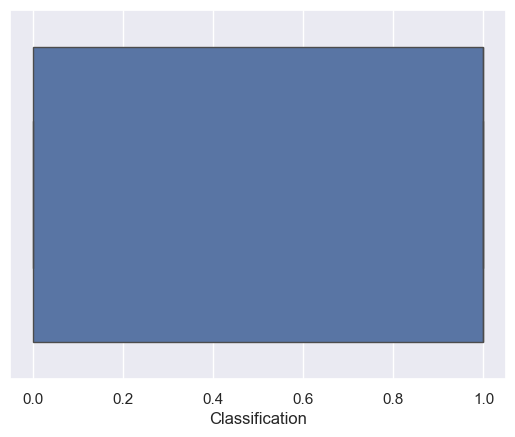

In [17]:
sns.boxplot(x=df['Classification'])

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                26.000000
BMI                 8.268237
Glucose            16.250000
Insulin             6.830000
HOMA                1.939821
Leptin             25.064625
Adiponectin         6.341687
Resistin           10.873445
MCP.1             430.106750
Classification      1.000000
dtype: float64


In [19]:
df.shape

(116, 10)

In [20]:
df = df[~((df < Q1-1.5*IQR)|(df>Q3+1.5*IQR))]
df.shape

(116, 10)

<Axes: >

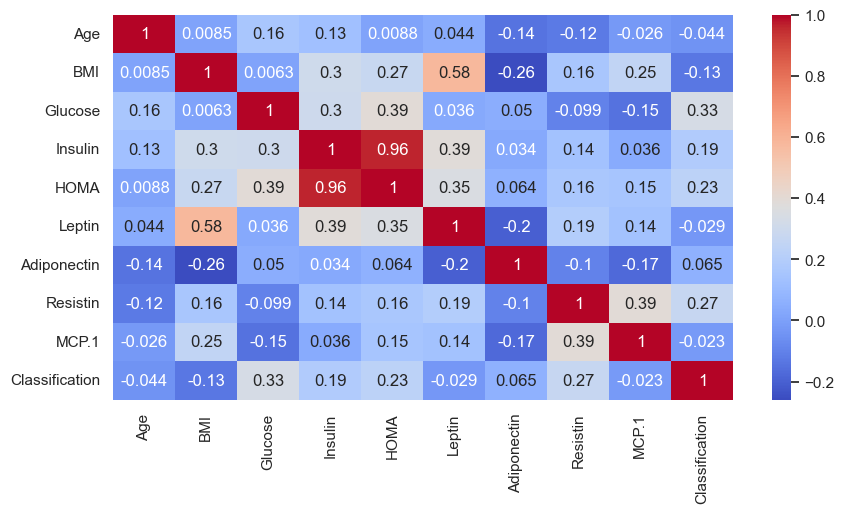

In [21]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

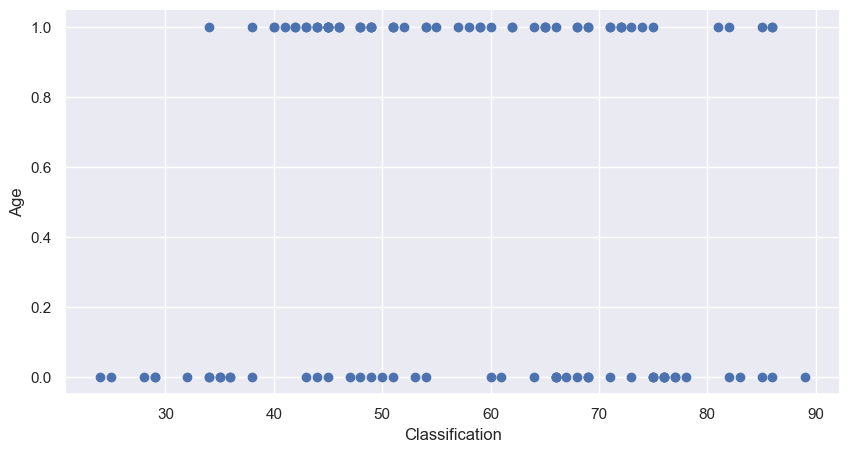

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['Age'], df['Classification'])
ax.set_xlabel('Classification')
ax.set_ylabel('Age')
plt.show()

Text(0.5, 0, 'Age')

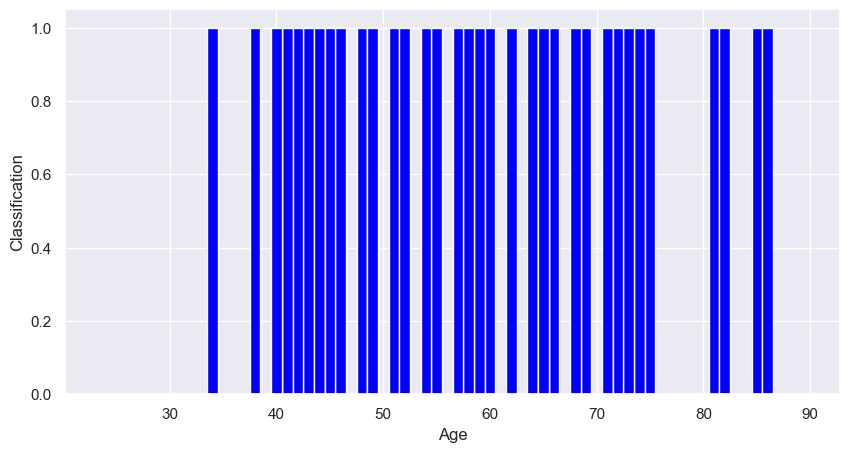

In [28]:
plt.figure(figsize=(10, 5))  # Bar graph
plt.bar(df['Age'], df['Classification'], color='blue',width = 1)
plt.ylabel('Classification')
plt.xlabel('Age')